In [30]:
%matplotlib inline
import skimage.io as imageio
import sys
import matplotlib.pyplot as plt

In [31]:
from helpers import android_helper

In [32]:
image = android_helper.get_screen_shoot()

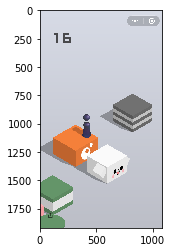

In [33]:
plt.imshow(image)

In [34]:
number_image = image[200:300, :400]

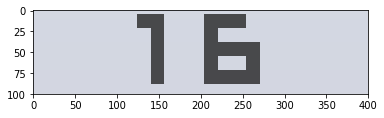

In [35]:
plt.imshow(number_image)

In [36]:
from skimage import feature
import skimage.color

In [37]:
gery_image = skimage.color.rgb2gray(number_image)

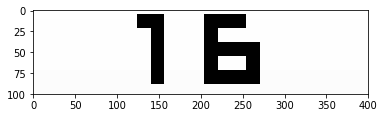

In [38]:
plt.imshow(gery_image, cmap='gray')

In [39]:
digtial_images = {}

In [40]:
for i in range(10):
    fn = '%s.png'%i
    digtial_images[i] = imageio.imread('digtial/' + fn)

In [41]:
def get_number_area(image):
    return image[200:300, :400]

In [42]:
for key in digtial_images:
    digtial_images[key] = get_number_area(digtial_images[key])

/Users/kidjourney/Program/python/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


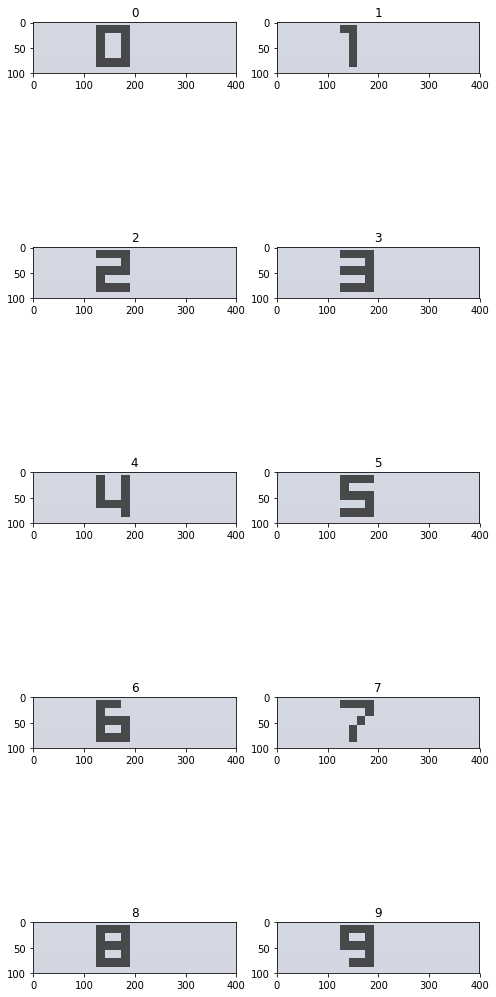

In [43]:
fig = plt.figure(figsize=(8,20))
for key in digtial_images:
    ax = fig.add_subplot(5, 2, key+1)
    ax.set_title(str(key))
    plt.imshow(digtial_images[key])
    fig.show()

In [44]:
number_one = digtial_images[0]

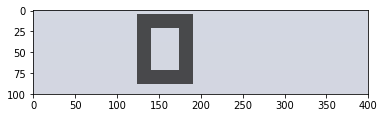

In [45]:
plt.imshow(number_one, cmap='gray')

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

gray_number_one = skimage.color.rgb2gray(number_one)
thresh = threshold_otsu(gray_number_one)

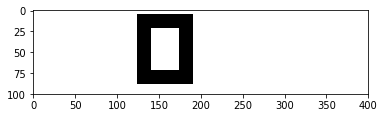

In [47]:
plt.imshow(gray_number_one > thresh, cmap='gray')

In [48]:
bw = closing(gray_number_one < thresh, square(3))

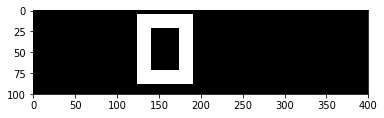

In [49]:
plt.imshow(bw, cmap='gray')

In [50]:
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)

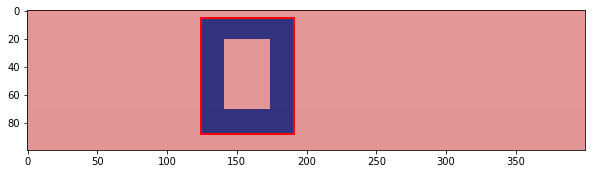

In [51]:
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=gray_number_one)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

In [52]:
from helpers.score_helper import get_score_object

In [56]:
ret = get_score_object(image)

/Users/kidjourney/Program/python/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


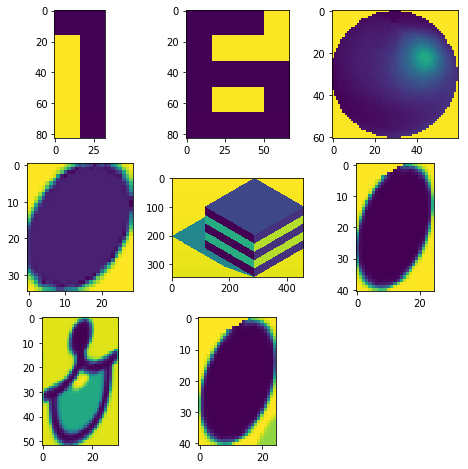

In [65]:
fig = plt.figure(figsize=(8,8))
for idx, i in enumerate(ret):
    fig.add_subplot(3,3, idx+1)
    plt.imshow(i)
fig.show()